In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Read in Data

df = pd.read_csv(r'D:\Downloads\movies.csv')


In [2]:
# View the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{:<10}  | {:>5.5f}%'.format(col, pct_missing)) # Align data for cleaner output


name        | 0.00000%
rating      | 0.01004%
genre       | 0.00000%
year        | 0.00000%
released    | 0.00026%
score       | 0.00039%
votes       | 0.00039%
director    | 0.00000%
writer      | 0.00039%
star        | 0.00013%
country     | 0.00039%
budget      | 0.28312%
gross       | 0.02465%
company     | 0.00222%
runtime     | 0.00052%


In [4]:
# Remove rows with missing/duplicate data and re-run above script 
# This step is to change the data types a few steps down

df.drop_duplicates()
df2 = df.dropna(axis=0)

for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{:<10}  | {:>5.5f}%'.format(col, pct_missing))

name        | 0.00000%
rating      | 0.00000%
genre       | 0.00000%
year        | 0.00000%
released    | 0.00000%
score       | 0.00000%
votes       | 0.00000%
director    | 0.00000%
writer      | 0.00000%
star        | 0.00000%
country     | 0.00000%
budget      | 0.00000%
gross       | 0.00000%
company     | 0.00000%
runtime     | 0.00000%


In [5]:
# Data Types in Columns

df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Cleaning data types of columns to eliminate unnecessary Zeros

df2['budget'] = df2['budget'].astype('int64')
df2['votes'] = df2['votes'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')
df2['runtime'] = df2['runtime'].astype('int64')

#View cleaned dataframe

df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [7]:
#Sort Data by Gross

df2.sort_values(by=['gross'], inplace=False, ascending =False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


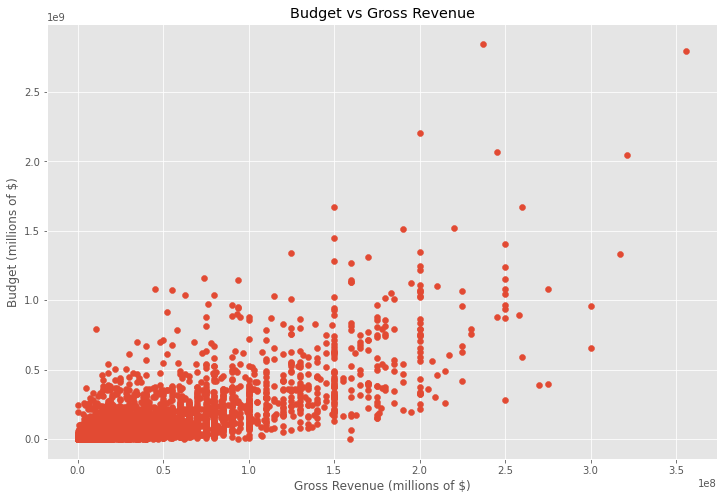

In [8]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue (millions of $)')
plt.ylabel('Budget (millions of $)')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

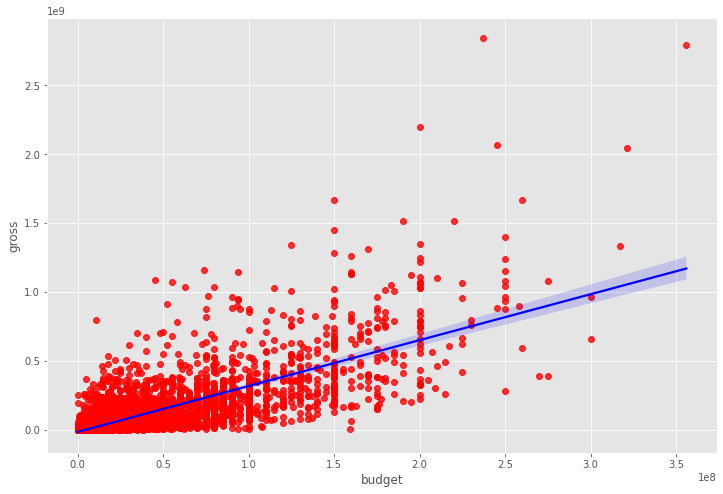

In [9]:
# Plot budget vs gross using seaborn to add a correlation line

sns.regplot(x='budget', y='gross', data = df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [10]:
# Looking at correlation using pearson method

df2.corr(method='pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


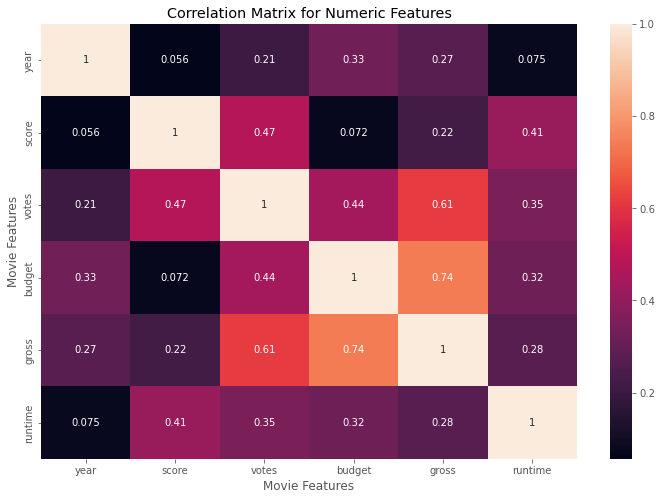

In [11]:
# Create visualization of correlations

correlation_matrix = df2.corr(method='pearson') 
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [12]:
# Assign numbers to all object data types in data frame

df3_numerized = df2

for col_name in df3_numerized.columns:
    if(df3_numerized[col_name].dtype == 'object'):
        df3_numerized[col_name] = df3_numerized[col_name].astype('category')
        df3_numerized[col_name]= df3_numerized[col_name].cat.codes
        
df3_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98


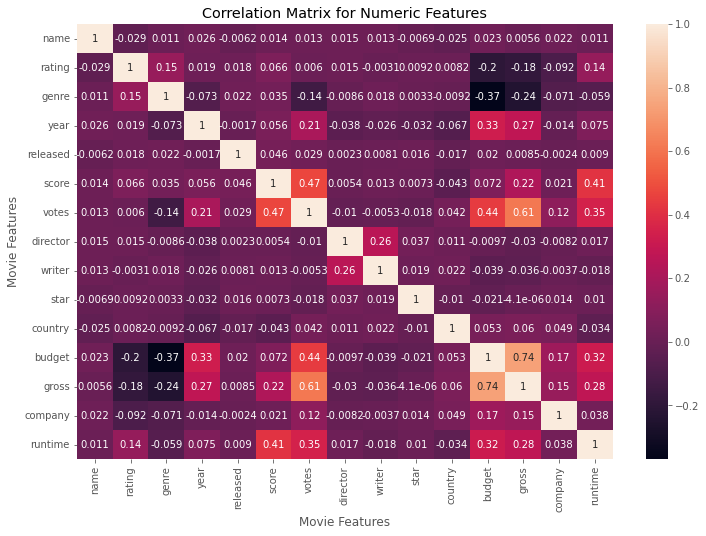

In [13]:
# Create visualization of all correlations

correlation_matrix2 = df3_numerized.corr(method='pearson') 
sns.heatmap(correlation_matrix2, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [25]:
# View Correlation Pairs and Sort by values

corr_pairs = correlation_matrix2.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(20) 

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
rating   budget    -0.203946
         gross     -0.181906
gross    rating    -0.181906
genre    votes     -0.135990
votes    genre     -0.135990
company  rating    -0.092357
rating   company   -0.092357
genre    year      -0.073167
year     genre     -0.073167
genre    company   -0.071334
company  genre     -0.071334
year     country   -0.066748
country  year      -0.066748
genre    runtime   -0.059237
runtime  genre     -0.059237
dtype: float64

In [15]:
# Filter Relevant Correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr = high_corr[(high_corr) != 1.0]

high_corr

runtime  score      0.414068
score    runtime    0.414068
votes    budget     0.439675
budget   votes      0.439675
votes    score      0.474256
score    votes      0.474256
votes    gross      0.614751
gross    votes      0.614751
         budget     0.740247
budget   gross      0.740247
dtype: float64

# We can conclude that there is a high correlation between the budget of a movie and it's gross revenue.